In [5]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [10]:
import nltk

In [11]:
#分词
from nltk.tokenize import word_tokenize
text = "Hello, how are you? Fine, Thank you, and you? I'm fine too."
tokens = word_tokenize(text)
print(tokens)

['Hello', ',', 'how', 'are', 'you', '?', 'Fine', ',', 'Thank', 'you', ',', 'and', 'you', '?', 'I', "'m", 'fine', 'too', '.']


In [12]:
#可设定规则的分词
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+') #括号里是设定的规则
tokens = tokenizer.tokenize(text)
print(tokens)

['Hello', 'how', 'are', 'you', 'Fine', 'Thank', 'you', 'and', 'you', 'I', 'm', 'fine', 'too']


In [13]:
#按句子分句
from nltk.tokenize import sent_tokenize
text = "Hello, how are you? Fine, Thank you, and you? I'm fine too."
sentences = sent_tokenize(text)
print(sentences)

['Hello, how are you?', 'Fine, Thank you, and you?', "I'm fine too."]


In [14]:
#判断语义相似度
from nltk.corpus import wordnet
word1 = wordnet.synset('mother.n.01')  #n.01表示名词，v.01表示动词，a.01表示形容词
word2 = wordnet.synset('cat.n.01')
similarity = word1.wup_similarity(word2)
print(similarity)

0.4444444444444444


In [15]:
#无意义的常用词汇
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in tokens if word.lower() in stop_words]
print(words)

['how', 'are', 'you', 'you', 'and', 'you', 'I', 'm', 'too']


In [17]:
#词性标注
from nltk import pos_tag
tagged = pos_tag(tokens)
print(tagged)

[('Hello', 'NNP'), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('Fine', 'NNP'), ('Thank', 'NNP'), ('you', 'PRP'), ('and', 'CC'), ('you', 'PRP'), ('I', 'PRP'), ('m', 'VBP'), ('fine', 'JJ'), ('too', 'RB')]


In [18]:
#选择特定的词和词性
tagged_token = nltk.tag.str2tuple('you/PRP')  #前面词，后面词性，会找出所有符合要求的组合，这里只放一个例子
print(tagged_token)

('you', 'PRP')


In [19]:
#命名实体识别
from nltk import ne_chunk
named_entities = ne_chunk(tagged)
print(named_entities)

(S
  (GPE Hello/NNP)
  how/WRB
  are/VBP
  you/PRP
  (PERSON Fine/NNP Thank/NNP)
  you/PRP
  and/CC
  you/PRP
  I/PRP
  m/VBP
  fine/JJ
  too/RB)


In [20]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# 词干提取
stemmer = PorterStemmer()
stemmed = [stemmer.stem(word) for word in tokens]
print(stemmed)

# 词形还原
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
print(lemmatized) 

['hello', 'how', 'are', 'you', 'fine', 'thank', 'you', 'and', 'you', 'i', 'm', 'fine', 'too']
['Hello', 'how', 'are', 'you', 'Fine', 'Thank', 'you', 'and', 'you', 'I', 'm', 'fine', 'too']


In [21]:
from textblob import TextBlob
text = "Natural Language Processing with TextBlob is fun and easy to use. I like to learn TextBolb"
blob = TextBlob(text)

In [22]:
# 分词
words = blob.words
print(words)

['Natural', 'Language', 'Processing', 'with', 'TextBlob', 'is', 'fun', 'and', 'easy', 'to', 'use', 'I', 'like', 'to', 'learn', 'TextBolb']


In [23]:
# 句子切分
sentences = blob.sentences
print(sentences)

[Sentence("Natural Language Processing with TextBlob is fun and easy to use."), Sentence("I like to learn TextBolb")]


In [24]:
#词性标注
pos_tags = blob.tags
print(pos_tags)

[('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('with', 'IN'), ('TextBlob', 'NNP'), ('is', 'VBZ'), ('fun', 'JJ'), ('and', 'CC'), ('easy', 'JJ'), ('to', 'TO'), ('use', 'VB'), ('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('learn', 'VB'), ('TextBolb', 'NNP')]


In [25]:
#情感分析
sentiment = blob.sentiment
print(sentiment)

Sentiment(polarity=0.2777777777777778, subjectivity=0.47777777777777786)


In [26]:
#拼写纠正
blob_with_typo = TextBlob("I havv goood speling")
corrected_blob = blob_with_typo.correct()
print(corrected_blob)

I have good spelling


In [27]:
# 词干提取
stems = [word.stem() for word in blob.words]
print(stems) 

# 词形还原
lemmas = [word.lemmatize() for word in blob.words]
print(lemmas)

['natur', 'languag', 'process', 'with', 'textblob', 'is', 'fun', 'and', 'easi', 'to', 'use', 'i', 'like', 'to', 'learn', 'textbolb']
['Natural', 'Language', 'Processing', 'with', 'TextBlob', 'is', 'fun', 'and', 'easy', 'to', 'use', 'I', 'like', 'to', 'learn', 'TextBolb']


In [28]:
#词云
from wordcloud import WordCloud
import matplotlib.pyplot as plt

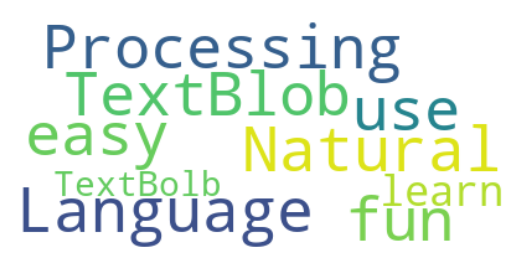

In [29]:
text = "Natural Language Processing with TextBlob is fun and easy to use. I like to learn TextBolb"
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
#贝叶斯分型器
from nltk.classify import NaiveBayesClassifier
import random
from nltk.corpus import names
#分割数据集,比如600个数据，你要400个做train,200个做test
featuresets = '你要的数据集'
train_set, test_set = featuresets[201:], featuresets[:201]
classifier = NaiveBayesClassifier.train(train_set)
#显示最有效5个数据
classifier.show_most_informative_features(5)
#接下来就是自己的machine learning代码了


ValueError: A ELE probability distribution must have at least one bin.

In [31]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# 数据标准化, 数据转换为均值为0，标准差为1的标准正态分布
data = np.array([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0],
    [10.0, 11.0, 12.0]
])
print("Original Data:\n", data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
'''
fit_transform 方法首先拟合数据（计算均值和标准差），然后对数据进行标准化转换。
fit 方法只计算均值和标准差，但不进行转换。
transform 方法使用之前计算的均值和标准差对数据进行标准化。
'''
print("Standardized Data:\n", scaled_data)

Original Data:
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
Standardized Data:
 [[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]


In [32]:
#把种类变换成数字，创造Dummy Variable
from sklearn.preprocessing import OneHotEncoder
data = np.array([
    ['red', 'small'],
    ['blue', 'large'],
    ['green', 'medium'],
    ['blue', 'small']
])
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data)
print("One-Hot Encoded Data:\n", encoded_data)
feature_names = encoder.get_feature_names_out(['color', 'size'])
print("Feature Names:\n", feature_names)

One-Hot Encoded Data:
 [[0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]]
Feature Names:
 ['color_blue' 'color_green' 'color_red' 'size_large' 'size_medium'
 'size_small']


In [33]:
#这个需要具体的数据集，然后分成一个训练组，一个测试组，没具体数据时run了没用
from sklearn.datasets import load_iris
iris = load_iris()
x, y = iris.data, iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [34]:
#线性回归，也是要有数据集
from sklearn.datasets import load_boston
boston = load_boston()
x, y = boston.data, boston.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [36]:
#文本中某个单词出现次数
#文本内容是text
from nltk.probability import FreqDist
#test就是你读取的文章
fdist = FreqDist(text)
fdist.most_common()  #这一步按顺序排出单词出现次数，如果想只看前几个，括号里可以加入数字
#查看某个单词出现次数
fdist['单词']

0

In [37]:
#每两个单词一组
from nltk import bigrams
bigram_list = list(bigrams(['We', 'are', 'best', 'friends', 'forever']))
print(bigram_list)
#我们还可以进一步计算词组的频率
bigram_freq = FreqDist(bigram_list)
print(bigram_freq)
print(bigram_freq.most_common())

[('We', 'are'), ('are', 'best'), ('best', 'friends'), ('friends', 'forever')]
<FreqDist with 4 samples and 4 outcomes>
[(('We', 'are'), 1), (('are', 'best'), 1), (('best', 'friends'), 1), (('friends', 'forever'), 1)]


In [39]:
#分析网页内容
from nltk.corpus import webtext
# 打印文件内容的前5行
text = '文件名'
print(webtext.raw(text)[:5])
# 获取文件中的词汇列表
words = webtext.words(text)
#打印前20个单词
print(words[:20])
# 获取文件中的句子列表
sentences = webtext.sents(text)
#打印前5个句子
print(sentences[:5])

LookupError: 
**********************************************************************
  Resource [93mwebtext[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('webtext')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/webtext[0m

  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
#分析处理聊天对话
from nltk.corpus import nps_chat
text = '文件名'
# 获取文件中的所有帖子
posts = nps_chat.posts(text)
# 获取文件中的所有词汇
words = nps_chat.words(text)
#打印前5个词
print(words[:5])